In [ ]:
!pip install libpysal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 11.7 MB/s eta 0:00:00


In [ ]:
!pip install esda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for esda: filename=esda-2.4.3-py3-none-any.whl size=122762 sha256=d02a16f489b712121d5597e6105c902886c5354df78c0ec391451cb66892cafc
  Stored in directory: /root/.cache/pip/wheels/ed/88/61/8705bb427b9aeb4ded8f07eb8ea3e8cada26881368c75619cb
Successfully built esda


In [ ]:
!pip install pysal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 25.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.2/220.2 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.9/112.9 kB 12.2 MB/s eta 

In [ ]:
import geopandas as gpd
import libpysal
import pysal
import esda
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from esda.moran import Moran

In [ ]:
!pip install splot

In [ ]:
from splot.esda import plot_moran

In [ ]:
from splot.esda import moran_scatterplot

In [ ]:
from splot.esda import lisa_cluster

In [ ]:
# Shapefile 로딩 (경로는 실제 데이터 파일의 경로에 맞게 수정해야 합니다)
gdf = gpd.read_file('/content/drive/MyDrive/데이터청년캠퍼스/공간 데이터 분석/NOGADA3/TL_SCCO_SIG_W.shp', encoding = 'utf-8')

In [ ]:
# 특정 열 선택 (예산 및 한부모가족 수 열을 선택합니다)

derived_facility = "SHAPE_AREA"
derived_values = gdf[derived_facility]

In [ ]:
# Queen 가중치 행렬 생성
wq = libpysal.weights.Queen.from_dataframe(gdf)

In [ ]:
# Spatial Lag 계산

lag_derived = libpysal.weights.lag_spatial(wq, derived_values)

In [ ]:
y=derived_values
moran = Moran(y, wq)
moran.I

0.4072222260129161

<function matplotlib.pyplot.show(close=None, block=None)>

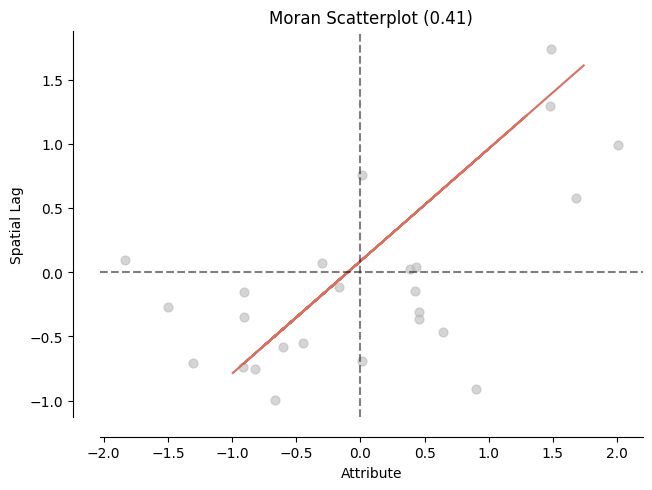

In [ ]:
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show

In [ ]:
m_local=esda.moran.Moran_Local(y,wq)

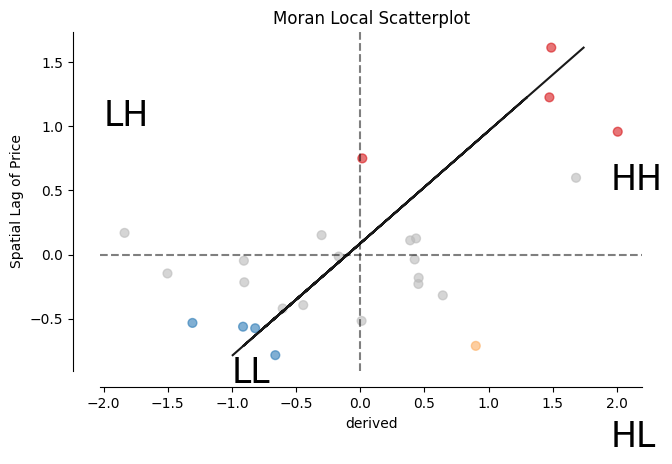

In [ ]:
# Plot
fig, ax = moran_scatterplot(m_local, p=0.05)
ax.set_xlabel('derived')
ax.set_ylabel('Spatial Lag of Price')
plt.text(1.95, 0.5, "HH", fontsize=25)
plt.text(1.95, -1.5, "HL", fontsize=25)
plt.text(-2, 1, "LH", fontsize=25)
plt.text(-1, -1, "LL", fontsize=25)
plt.show()

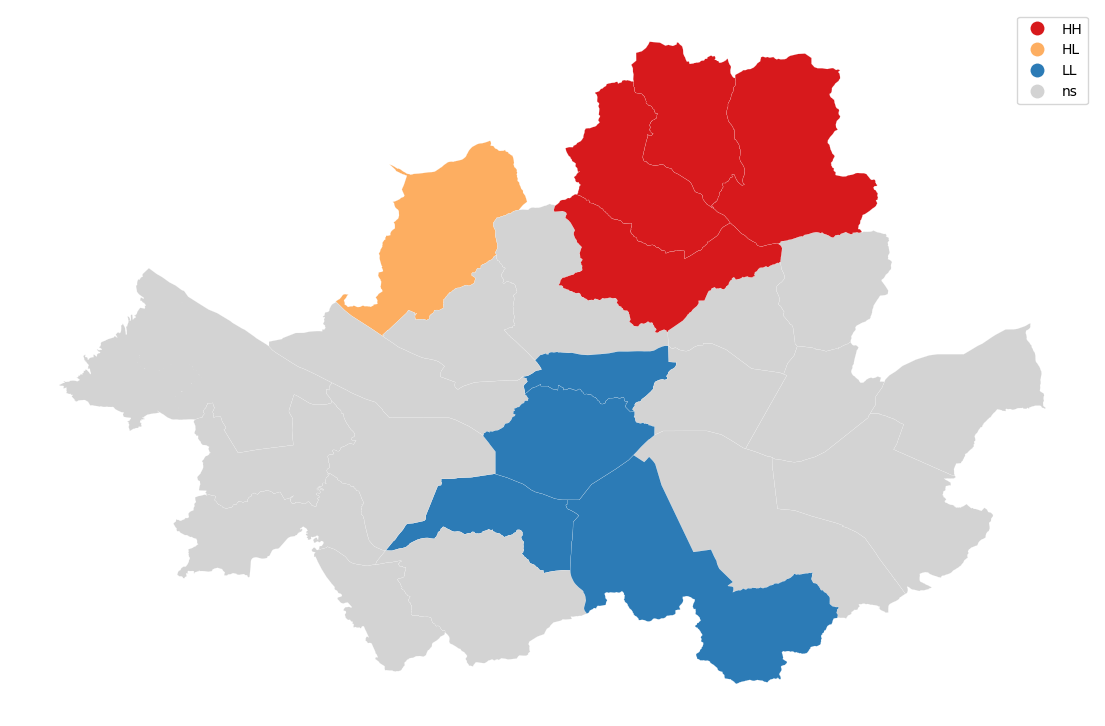

In [ ]:
fig, ax = plt.subplots(figsize=(14,12))
lisa_cluster(m_local, gdf, p=0.05, figsize = (16,12),ax=ax)
plt.show()

In [ ]:
# Moran's I 분석
moran_derived = esda.Moran(derived_values, wq)

In [ ]:
# Moran's I 결과 출력
print("Moran's I (derived):", moran_derived.I)
print("Moran's p-value (derived):", moran_derived.p_sim)

Moran's I (derived): 0.4072222260129161
Moran's p-value (derived): 0.002


/usr/local/lib/python3.10/dist-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


(<Figure size 1000x400 with 2 Axes>,
 array([<Axes: title={'center': 'Reference Distribution'}, xlabel='Moran I: 0.21', ylabel='Density'>,
        <Axes: title={'center': 'Moran Scatterplot (0.21)'}, xlabel='Attribute', ylabel='Spatial Lag'>],
       dtype=object))

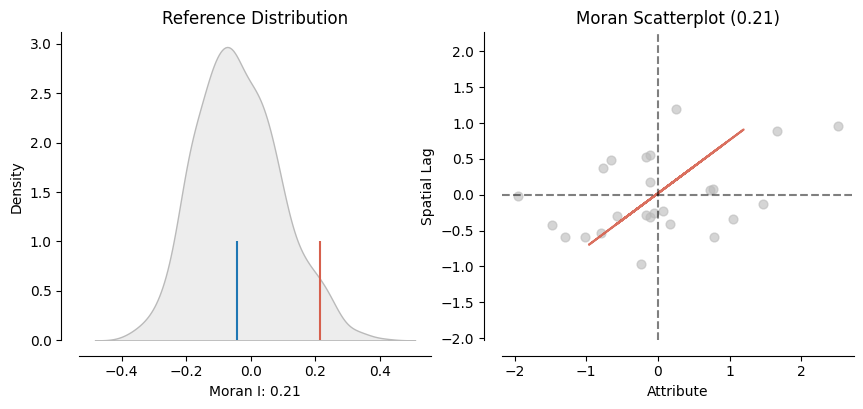

In [ ]:
# Moran's I 시각화
plot_moran(moran_derived, zstandard=True, figsize=(10, 4))

Text(0, 0.5, 'Spatial Lag of TOTAL_BUDG')

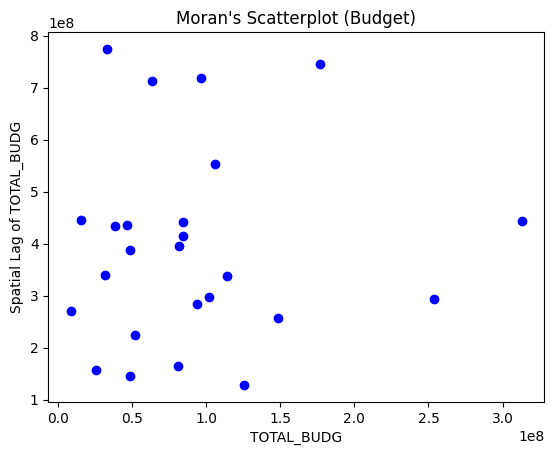

In [ ]:
# 공간 상관관계 시각화 (Moran's Scatterplot)
plt.scatter(budget_values, lag_budget, color='blue')
plt.title("Moran's Scatterplot (Budget)")
plt.xlabel(budget_column)
plt.ylabel("Spatial Lag of " + budget_column)

In [ ]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Spatial Lag of LOW_INCOME')

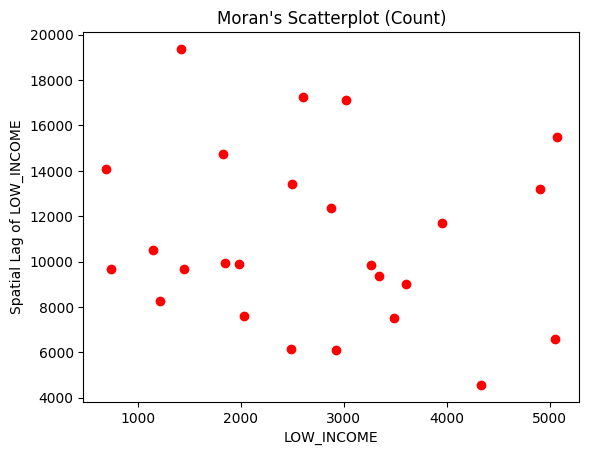

In [ ]:
plt.scatter(count_values, lag_count, color='red')
plt.title("Moran's Scatterplot (Count)")
plt.xlabel(count_column)
plt.ylabel("Spatial Lag of " + count_column)

In [ ]:
plt.show()

In [ ]:
# pip install geopandas libpysal esda matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for esda: filename=esda-2.4.3-py3-none-any.whl size=122762 sha256=1386de4a63243860cfce8efcf5ce9803fd112e177111982c0f6ed12133bf4689
  Stored in directory: /root/.cache/pip/wheels/ed/88/61/8705bb427b9aeb4ded8f07eb8ea3e8cada26881368c75619cb
Successfully built esda
